Ridge (L2) does well when there are many correlated features because it can distribute the impact across all of them, but it doesn't perform feature selection.  
Lasso (L1) can zero out irrelevant features, making it great for feature selection. However, Lasso can behave unpredictably when the features are highly correlated — it tends to arbitrarily select one feature and ignore the others, which may not always be ideal.  

### Elastic Net addresses these issues by combining both penalties, giving you:
Ridge’s ability to handle multicollinearity (high correlation between features).  
Lasso’s ability to perform feature selection, especially when you have many irrelevant or redundant features.

Predicted values  [ 40837.61 122887.43  65079.6 ]
Real values	  [ 37731 122391  57081]
Trained W	  9323.84
Trained b	  26851.84


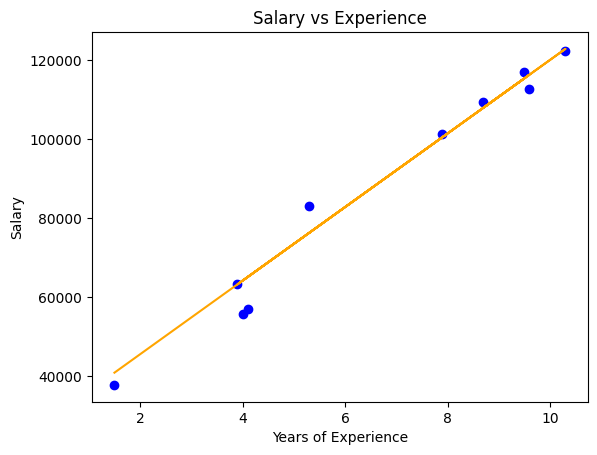

In [1]:
# Importing libraries 

import numpy as np 

import pandas as pd 

from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 

# Elastic Net Regression 

class ElasticRegression() : 
	
	def __init__( self, learning_rate, iterations, l1_penality, l2_penality ) : 
		
		self.learning_rate = learning_rate 
		
		self.iterations = iterations 
		
		self.l1_penality = l1_penality 
		
		self.l2_penality = l2_penality 
		
	# Function for model training 
			
	def fit( self, X, Y ) : 
		
		# no_of_training_examples, no_of_features 
		
		self.m, self.n = X.shape 
		
		# weight initialization 
		
		self.W = np.zeros( self.n ) 
		
		self.b = 0
		
		self.X = X 
		
		self.Y = Y 
		
		# gradient descent learning 
				
		for i in range( self.iterations ) : 
			
			self.update_weights() 
			
		return self
	
	# Helper function to update weights in gradient descent 
	
	def update_weights( self ) : 
			
		Y_pred = self.predict( self.X ) 
		
		# calculate gradients 
		
		dW = np.zeros( self.n ) 
		
		for j in range( self.n ) : 
			
			if self.W[j] > 0 : 
				
				dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) +
						
						self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m 
		
			else : 
				
				dW[j] = ( - ( 2 * ( self.X[:,j] ).dot( self.Y - Y_pred ) ) 
						
						- self.l1_penality + 2 * self.l2_penality * self.W[j] ) / self.m 

	
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
		
		# update weights 
	
		self.W = self.W - self.learning_rate * dW 
	
		self.b = self.b - self.learning_rate * db 
		
		return self
	
	# Hypothetical function h( x ) 
	
	def predict( self, X ) : 
	
		return X.dot( self.W ) + self.b 
		
# Driver Code 

def main() : 
	
	# Importing dataset 
	
	df = pd.read_csv( "salary_data.csv" ) 

	X = df.iloc[:,:-1].values 

	Y = df.iloc[:,1].values 
	
	# Splitting dataset into train and test set 

	X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
														
											test_size = 1/3, random_state = 0 ) 
	
	# Model training 
	
	model = ElasticRegression( iterations = 1000, 
								
					learning_rate = 0.01, l1_penality = 500, l2_penality = 1 ) 

	model.fit( X_train, Y_train ) 
	
	# Prediction on test set 

	Y_pred = model.predict( X_test ) 
	
	print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
	
	print( "Real values	 ", Y_test[:3] ) 
	
	print( "Trained W	 ", round( model.W[0], 2 ) ) 
	
	print( "Trained b	 ", round( model.b, 2 ) ) 
	
	# Visualization on test set 
	
	plt.scatter( X_test, Y_test, color = 'blue' ) 
	
	plt.plot( X_test, Y_pred, color = 'orange' ) 
	
	plt.title( 'Salary vs Experience' ) 
	
	plt.xlabel( 'Years of Experience' ) 
	
	plt.ylabel( 'Salary' ) 
	
	plt.show() 
		

if __name__ == "__main__" : 
	
	main()
